In [85]:
%matplotlib inline

In [108]:
import pandas as pd
import numpy as np
import networkx as nx
import scipy.io as sio
import scipy.sparse as sp
from tqdm import tqdm
from matplotlib import pyplot as plt
from helpers import (
    draw_edges, get_borderless_fig, pos_spring_layout, signed_layout, get_lcc, signed_normalized_laplacian, flatten,
    pos_adj, neg_adj
)
from viz_helpers import draw_query_result
from stat_helpers import populate_fields

In [93]:
fields_to_show = [ 'size1', 'size2', 'agreement', 'ham', 'beta', 'coh', 'opp', 'max_posdeg']

def show(g, df, idx, prefix='', **kwargs):    
    r = df.loc[idx]
    fig, ax = draw_query_result(g, r['C1'], r['C2'], **kwargs)
    ax.set_title('{} agr:{:.2f}, ham:{:.2f}, beta:{:.2f}, opp:{:.2f}, coh:{:.2f}, max_posdeg:{:.2f}'.format(
        prefix, r['agreement'], r['ham'], r['beta'], r['opp'], r['coh'], r['max_posdeg']
    ))
    
def show_top_k_by(g, df, by, k=3, ascending=False):
    rs = df[fields_to_show].sort_values(by=by, ascending=ascending).head(k)
    for idx in rs.index:
        show(g, df, idx, 'Ranked by *{}* '.format(by))
     
    # special treatment to "word" graph
    if graph == 'word':
        for idx in rs.index:
            r = df.iloc[idx]
            print('C1:', ', '.join([g.graph['i2w'][n] for n in r['C1']]))
            print('C2:', ', '.join([g.graph['i2w'][n] for n in r['C2']]))        
            print()        
            
def load_data(graph):
    g = nx.read_gpickle('graphs/{}.pkl'.format(graph))
    df = pd.read_pickle('outputs/focg_{}_aug.pkl'.format(graph))
    return g, df

def graph_showcase(graph):
    g, df = load_data(graph)
    print('got {} entries'.format(df.shape[0]))
    keys = ['beta', 'ham', 'opp']
    for key in keys:
        if key == 'beta':
            ascending = True
        else:
            ascending = False
        show_top_k_by(g, df, key, k=3, ascending=ascending)    

# pre-processing

- consider communities with `> ${threshold}` as "good" ones
- only takes those:
  - with exactly **two** good ones
  - the two communities does not overlap

got 4 entries


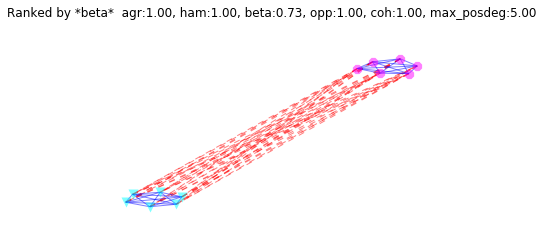

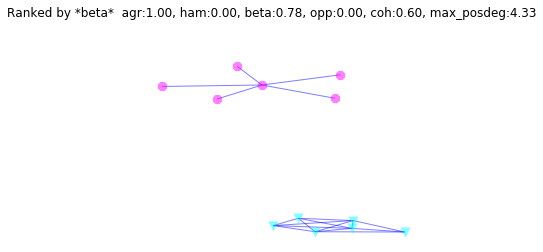

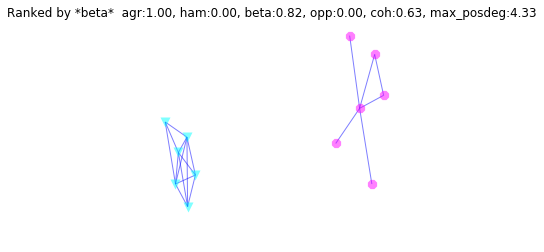

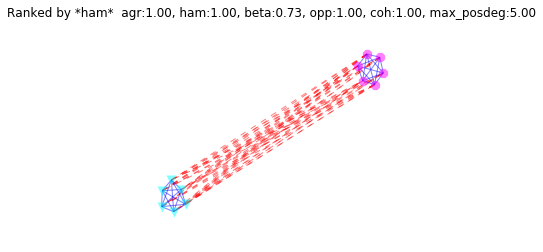

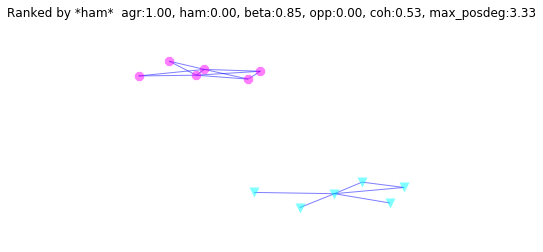

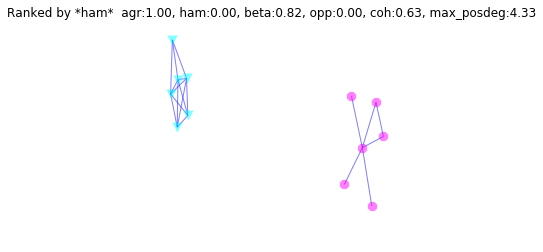

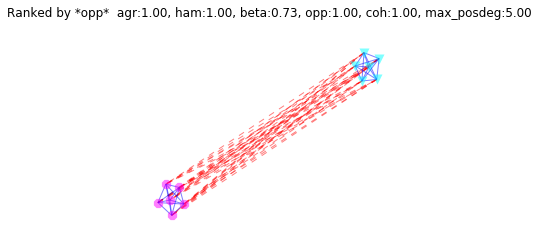

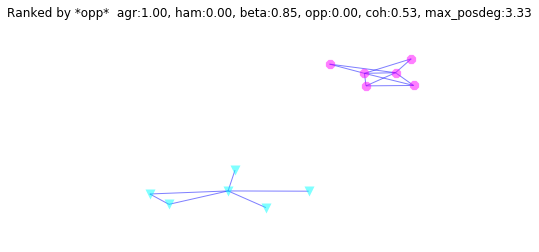

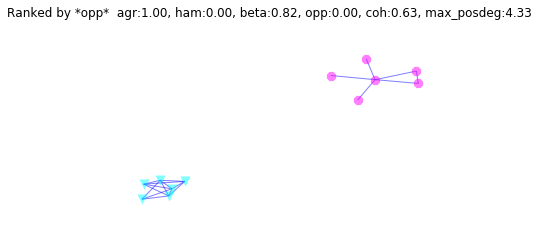

In [95]:
graph_showcase('word')

got 7 entries


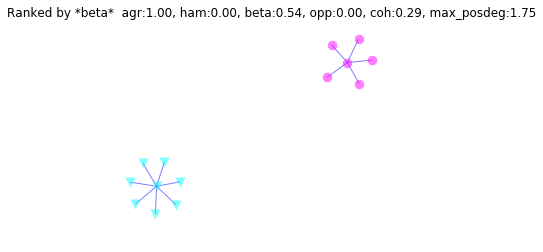

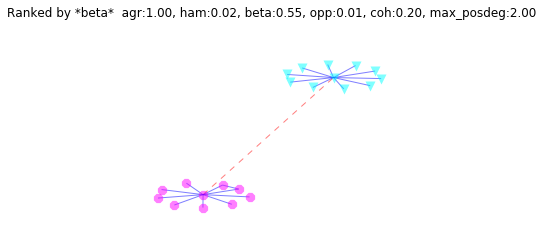

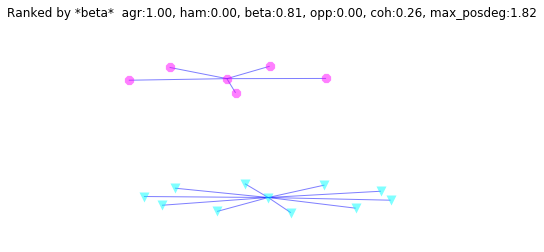

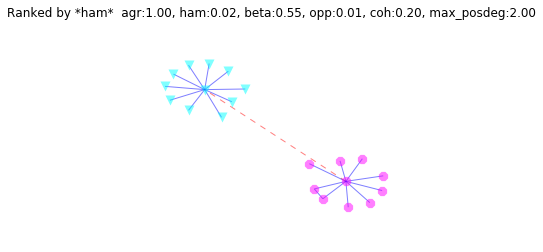

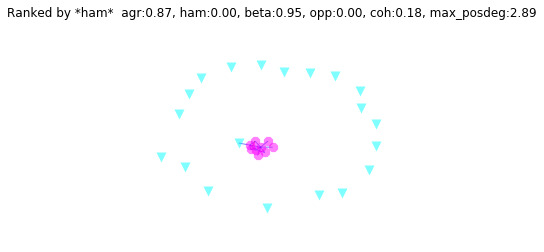

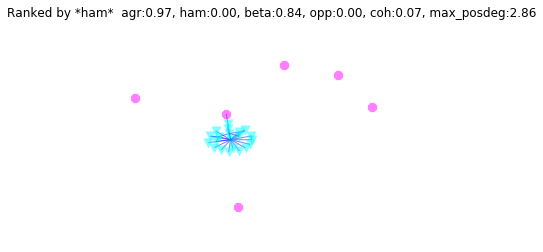

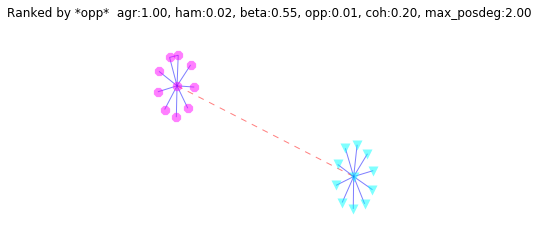

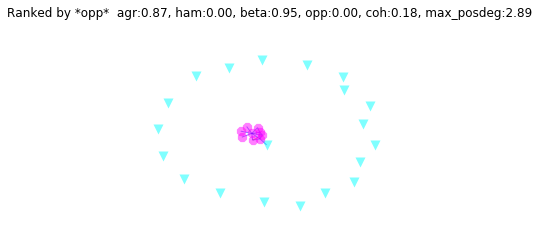

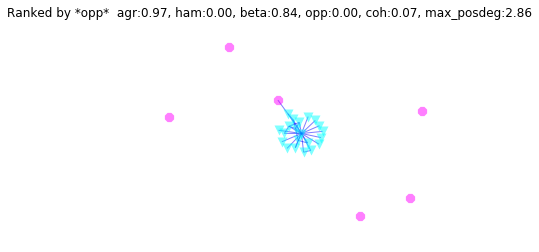

In [96]:
graph_showcase('bitcoin')

got 34 entries


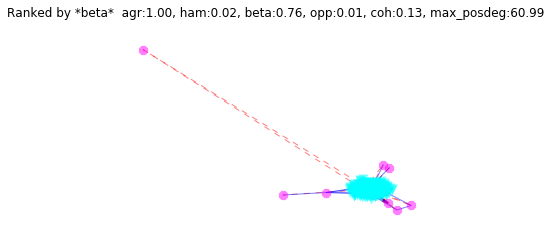

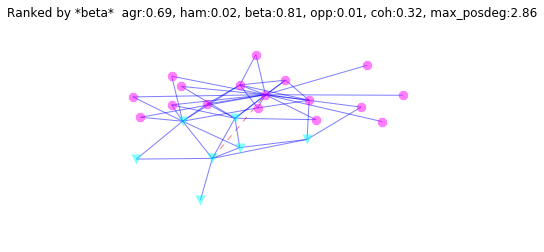

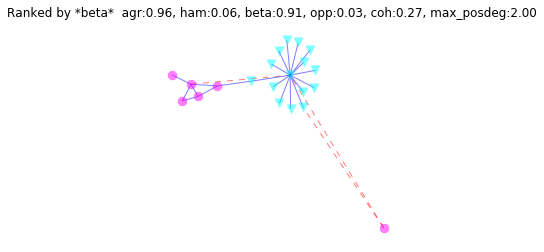

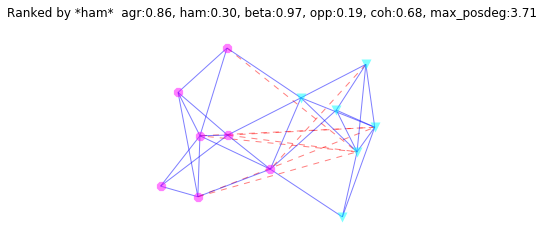

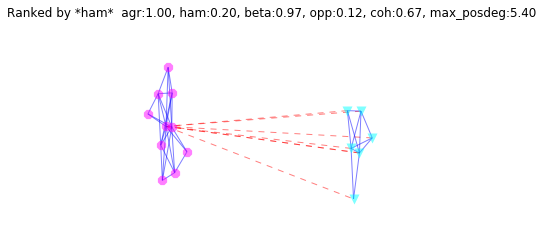

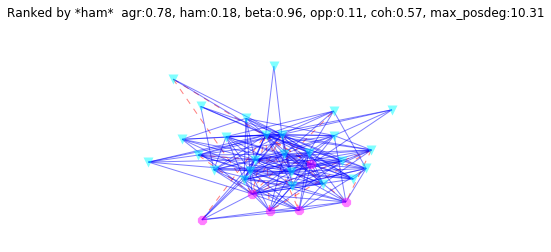

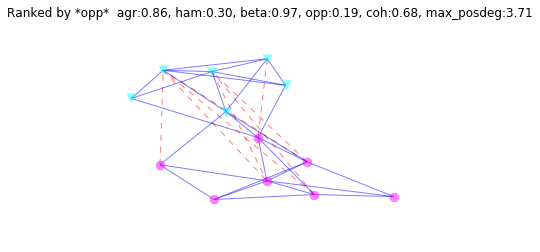

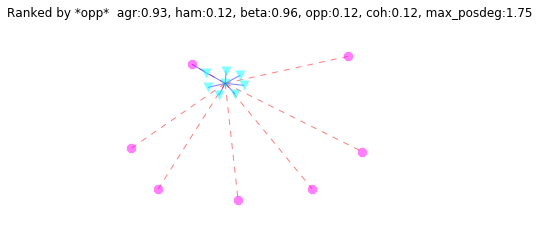

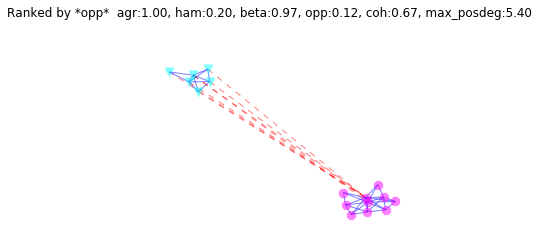

In [97]:
graph_showcase('ref')

got 201 entries


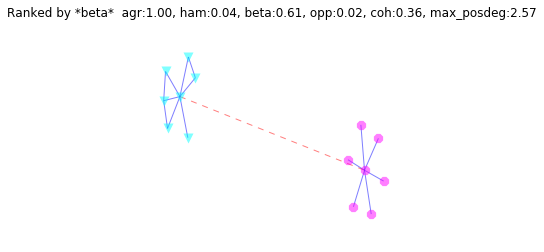

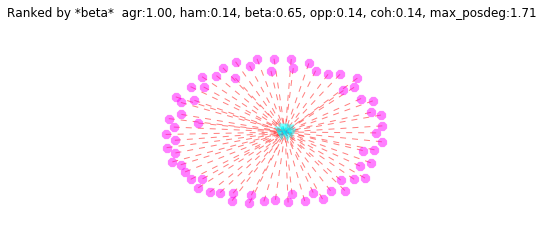

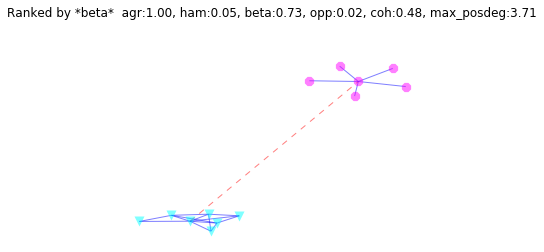

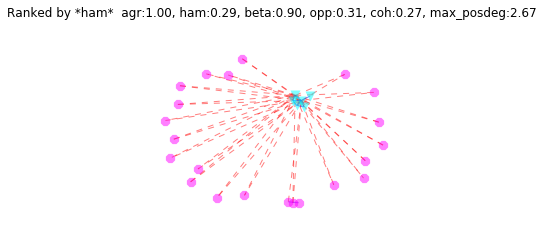

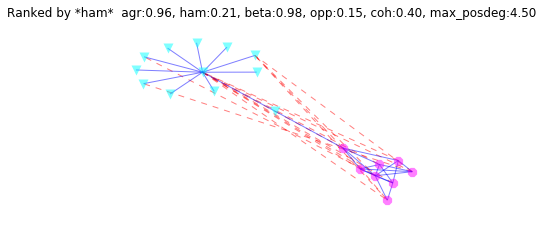

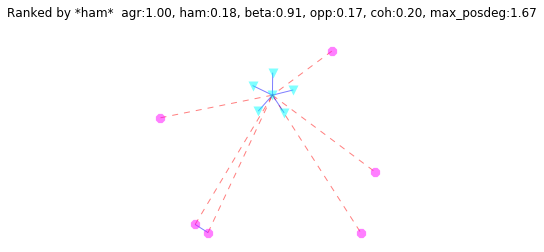

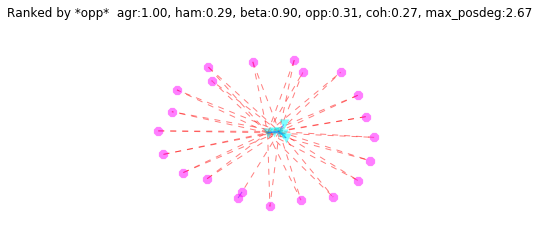

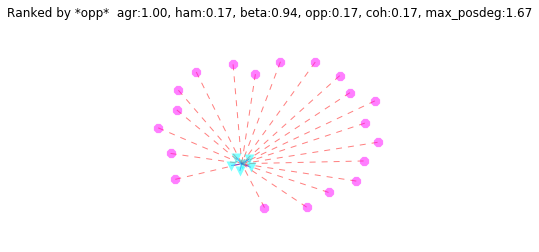

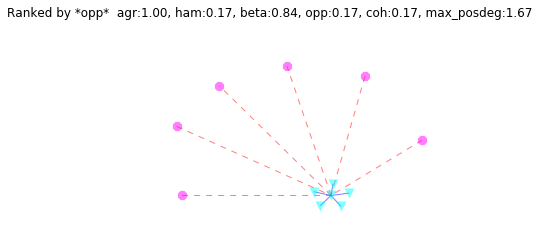

In [98]:
graph_showcase('slashdot')

got 174 entries


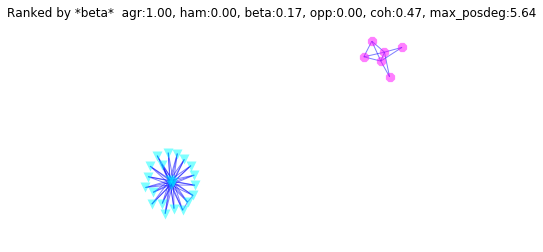

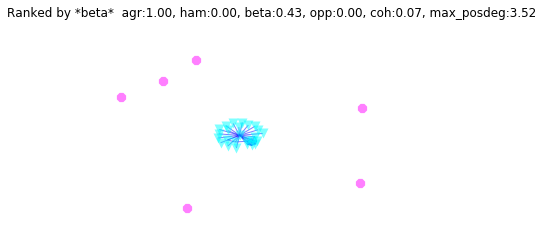

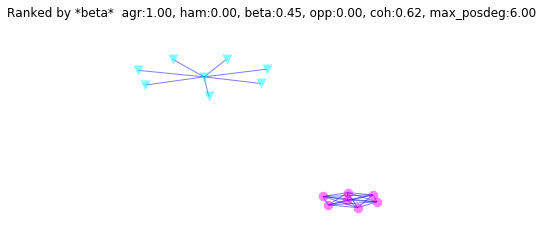

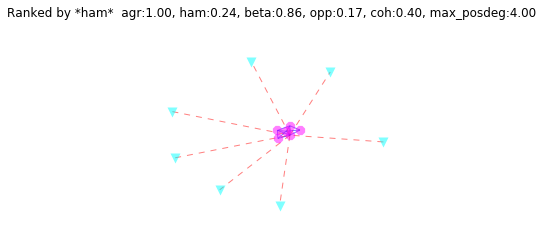

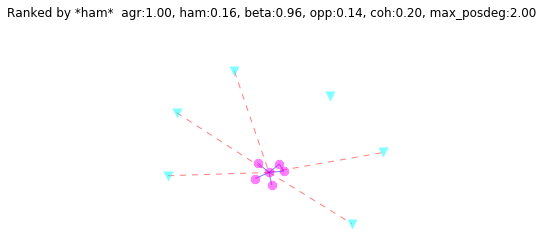

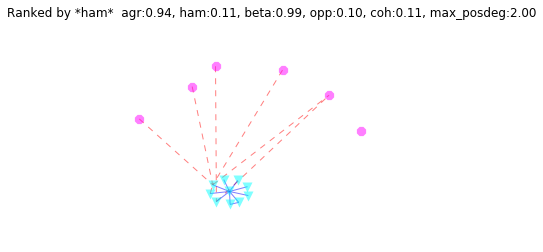

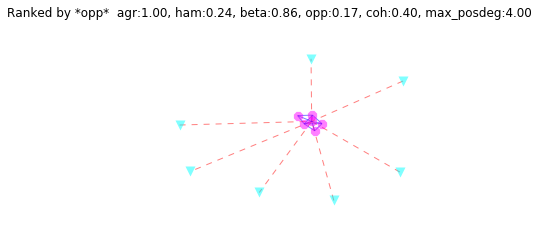

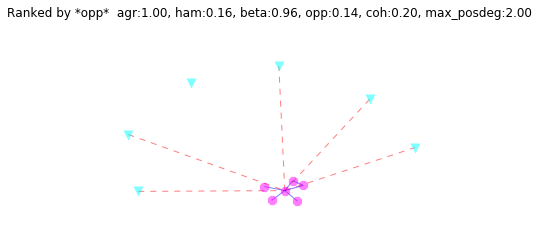

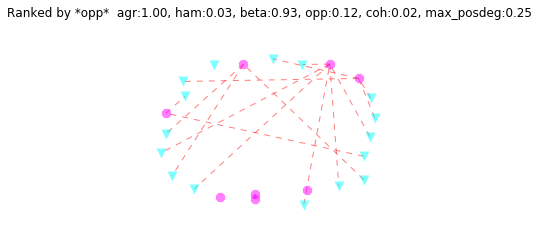

In [99]:
graph_showcase('epinions')

got 89 entries


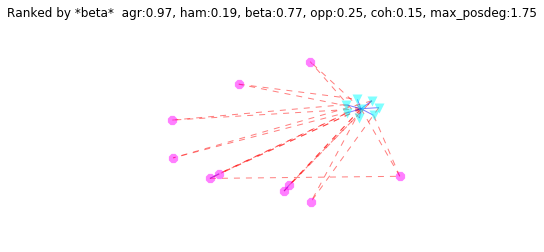

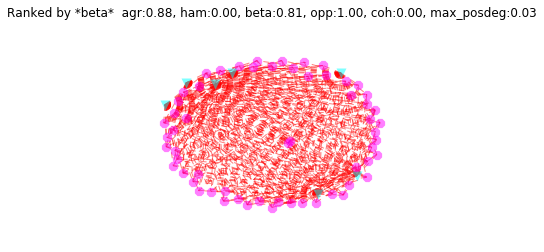

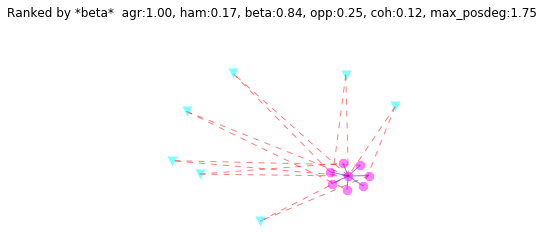

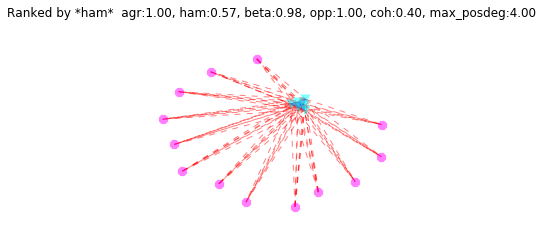

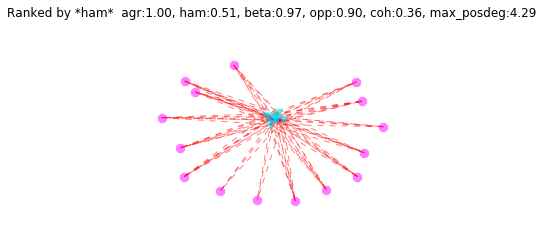

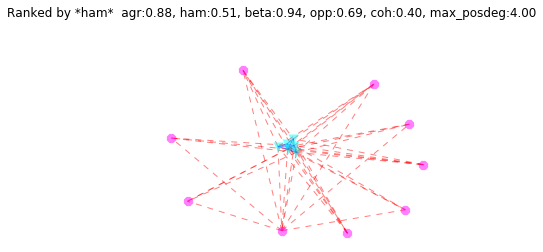

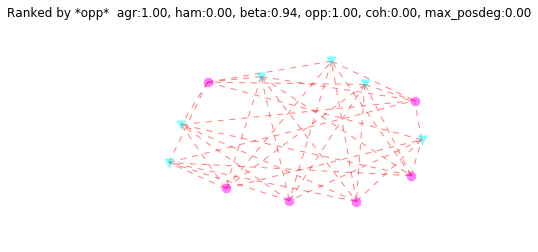

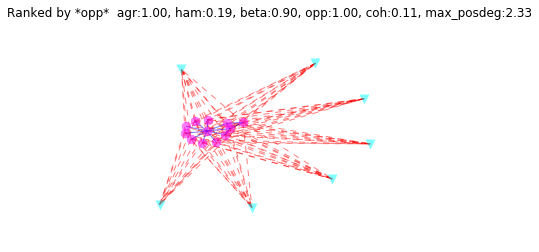

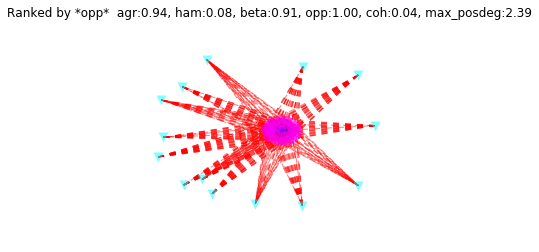

In [100]:
graph_showcase('wikiconflict')

# are groups overlapping?

In [112]:
for graph_name in ('word', 'bitcoin', 'ref', 'epinions', 'wikiconflict', 'slashdot'):
    g, df = load_data(graph_name)
    for i in tqdm(df.index):
        ri = df.loc[i]
        Ci = set(ri['C1']) | set(ri['C2'])    
        for j in df.index:
            if i != j:
                rj = df.loc[j]
                Cj = set(rj['C1']) | set(rj['C2'])    
                assert len(Ci.intersection(Cj)) == 0

100%|██████████| 201/201 [00:12<00:00, 15.73it/s]
